# Problem 1

## Importing Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading CSV Into Pandas

In [76]:
df = pd.read_csv(r'EuCitiesTemperatures.csv')
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,NaN,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,NaN,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


## Preprocessing/Analysis
1. [9 pts] Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.

In [85]:
df["latitude"] = df["latitude"].fillna(df.groupby("country")["latitude"].transform('mean'))
df["latitude"] = df["latitude"].round(2)

df["longitude"] = df["longitude"].fillna(df.groupby("country")["longitude"].transform('mean'))
df["longitude"] = df["longitude"].round(2)

df

,city,country,population,EU,coastline,latitude,longitude,temperature,color
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.180000,red
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.481538,orange
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.540000,blue
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.910000,orange
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.790000,orange
...,...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.314494,red
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.140000,red
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.000000,orange
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.600000,orange


2. [9 pts] Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

In [78]:
cityFilter = df.loc[(df['latitude'] >= 40) & (df['latitude'] <= 60) & (df['longitude'] >= 15) & (df['longitude'] <= 30)]

countryFreq = cityFilter['country'].value_counts()

title = countryFreq.index.tolist()

max_value = max(countryFreq)

country = [index for index, value in enumerate(countryFreq) if value == max_value]

returnCountry = []

for item in country:
    returnCountry.append(title[item])

returnCountry

['Romania', 'Poland']

3. [10 pts] Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).

In [79]:
df["temperature"] = (df["temperature"].fillna(df.groupby(["coastline", "EU"])["temperature"].transform("mean")))
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.180000
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.481538
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.540000
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.910000
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.790000
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.314494
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.140000
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.000000
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.600000


# Visualization

1. [6 pts] Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

Text(0, 0.5, 'Number of Cities')

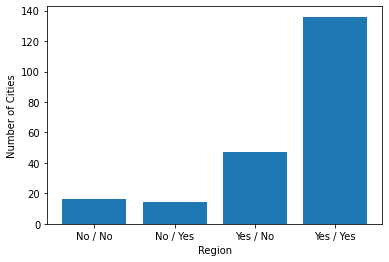

In [80]:
cityFreq = df.groupby(["coastline", "EU"])['city'].value_counts()
cityFreqList = cityFreq.index.tolist()

data = {}
for item in cityFreqList:
    
    key = item[0].capitalize()+' / '+item[1].capitalize()
    if key in data:
        data[key] += 1
    else:
       data[key] = 1

keys = data.keys()
value = data.values()

plt.bar(keys, value)
plt.xlabel("Region")
plt.ylabel("Number of Cities")

2. [7 pts] Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.

Text(0, 0.5, 'Latitude')

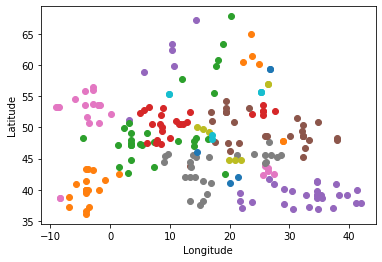

In [81]:
groups = df.groupby("country")
for name, group in groups:
    plt.plot(group["longitude"], group["latitude"], marker="o", linestyle="", label=name)

plt.xlabel("Longitude")
plt.ylabel("Latitude")

3. [6 pts] The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

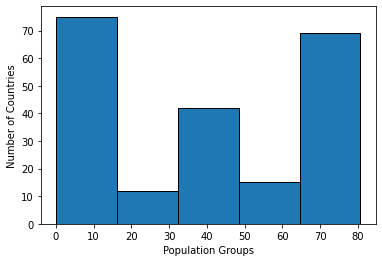

In [82]:
num_bins = 5
plt.hist(df['population'], num_bins, edgecolor = 'black')
plt.xlabel('Population Groups')
plt.ylabel('Number of Countries')
plt.show()

4. [8 pts] Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.

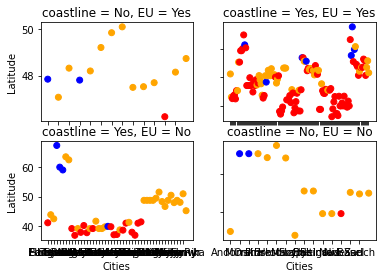

In [83]:
condtions = [
    (df['temperature'] > 10),
    (df['temperature'] < 6),
    (df['temperature'] >= 6) & (df['temperature'] <= 10)
]

values = ['red', 'blue', 'orange']

df['color'] = np.select(condtions, values)

group = df.groupby(["coastline", "EU"])

fig, axs = plt.subplots(2, 2)

#Graph 1

axs[0, 0].set_title('coastline = No, EU = Yes')
graph1Data = group.get_group(('no', 'yes'))

color = graph1Data['color'].to_list()

axs[0, 0].scatter(graph1Data['city'].to_list(), graph1Data['latitude'].to_list(), c = color)

axs[0, 0].set_xticks(ticks = range(len(color) - 1))

#Graph 2

axs[0, 1].set_title('coastline = Yes, EU = Yes')
graph2Data = group.get_group(('yes', 'yes'))

color = graph2Data['color'].to_list()

axs[0, 1].scatter(graph2Data['city'].to_list(), graph2Data['latitude'].to_list(), c = color)

axs[0, 1].set_xticks(ticks = range(len(color) - 1))

#Graph 3

axs[1, 0].set_title('coastline = Yes, EU = No')
graph3Data = group.get_group(('yes', 'no'))

color = graph3Data['color'].to_list()

axs[1, 0].scatter(graph3Data['city'].to_list(), graph3Data['latitude'].to_list(), c = color)

axs[1, 0].set_xticks(ticks = range(len(color) - 1))

#Graph 4

axs[1, 1].set_title('coastline = No, EU = No')
graph4Data = group.get_group(('no', 'no'))

color = graph4Data['color'].to_list()

axs[1, 1].scatter(graph4Data['city'].to_list(), graph4Data['latitude'].to_list(), c = color)

axs[1, 1].set_xticks(ticks = range(len(color) - 1))

for ax in axs.flat:
    ax.set(xlabel='Cities', ylabel='Latitude')

for ax in axs.flat:
    ax.label_outer()